In [58]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [59]:
data = pd.read_csv('../dataset/data_D.csv')

In [60]:
data.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [61]:
data.shape

(41259, 15)

In [62]:
data.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


### EDA

In [64]:
data['churn'].value_counts()

churn
0    32540
1     8719
Name: count, dtype: int64

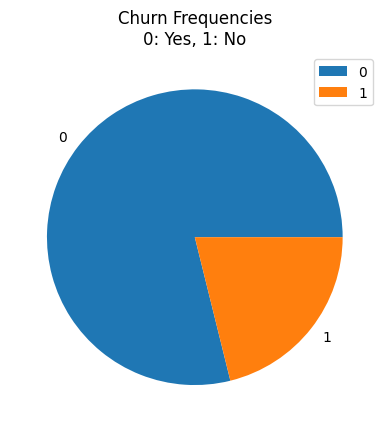

In [65]:
churn_freq = data['churn'].value_counts()

labels = churn_freq.index
value = churn_freq.values

plt.title("Churn Frequencies\n0: Yes, 1: No")
plt.pie(value, labels=labels)
plt.legend()
plt.show()

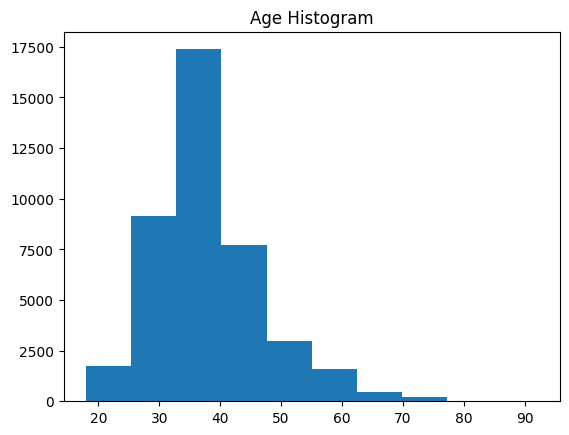

In [66]:
plt.title("Age Histogram")
plt.hist(data['Age'])
plt.show()

### Preprocessing

In [67]:
data.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

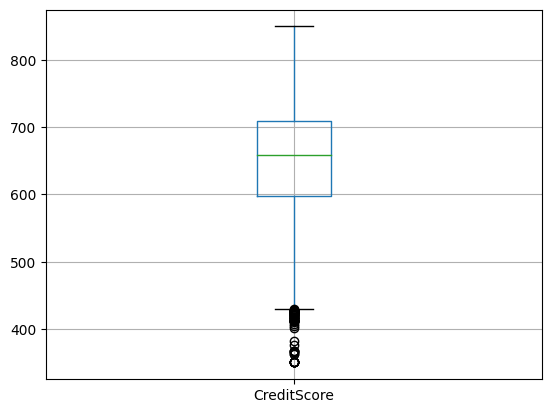

In [68]:
boxplot = data.boxplot(column=['CreditScore'])
plt.show()

In [69]:
creditscore_mean = np.mean(data['CreditScore'])

In [70]:
data['CreditScore'].fillna(creditscore_mean, inplace=True)

In [71]:
columns_to_drop = ['Unnamed: 0', 'id', 'CustomerId', 'Surname']

data.drop(columns=columns_to_drop, inplace=True)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41259 non-null  float64
 1   Geography        41259 non-null  object 
 2   Gender           41259 non-null  object 
 3   Age              41259 non-null  float64
 4   Tenure           41259 non-null  int64  
 5   Balance          41259 non-null  float64
 6   NumOfProducts    41259 non-null  int64  
 7   HasCrCard        41259 non-null  int64  
 8   IsActiveMember   41259 non-null  int64  
 9   EstimatedSalary  41259 non-null  float64
 10  churn            41259 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 3.5+ MB


In [73]:
print(data['Geography'].value_counts())

Geography
France     23520
Spain       9081
Germany     8658
Name: count, dtype: int64


In [74]:
print(data['Gender'].value_counts())

Gender
Male      23166
Female    18093
Name: count, dtype: int64


In [75]:
encoder = LabelEncoder()

category_columns = ['Gender', 'Geography']

for col in category_columns :
    data[col] = encoder.fit_transform(data[col])

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41259 non-null  float64
 1   Geography        41259 non-null  int64  
 2   Gender           41259 non-null  int64  
 3   Age              41259 non-null  float64
 4   Tenure           41259 non-null  int64  
 5   Balance          41259 non-null  float64
 6   NumOfProducts    41259 non-null  int64  
 7   HasCrCard        41259 non-null  int64  
 8   IsActiveMember   41259 non-null  int64  
 9   EstimatedSalary  41259 non-null  float64
 10  churn            41259 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.5 MB


In [77]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,0,0,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,0,1,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,1,0,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,0,0,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,1,0,46.0,4,107720.57,1,0,0,93832.33,1


In [78]:
column_to_normalize = ['CreditScore', 'Balance', 'EstimatedSalary']

In [79]:
# Standard Scaler

standard_scaler = StandardScaler()

data_standard = data.copy()

for col in column_to_normalize :
    reshaped_data_col = data_standard[col].values.reshape(-1, 1)
    data_standard[col] = standard_scaler.fit_transform(reshaped_data_col)

In [80]:
# Min Max Scaler

min_max_scaler = MinMaxScaler()

data_min_max = data.copy()

for col in column_to_normalize :
    reshaped_data_col = data_min_max[col].values.reshape(-1, 1)
    data_min_max[col] = min_max_scaler.fit_transform(reshaped_data_col)

In [81]:
x = data.drop(columns=['churn'],axis=1)
y = data['churn']

In [82]:
x_standard = data_standard.drop(columns=['churn'])
y_standard = data_standard['churn']

In [83]:
x_minmax = data_min_max.drop(columns=['churn'])
y_minmax = data_min_max['churn']

In [84]:
# training

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_standard, x_test_standard, y_train_standard, y_test_standard = train_test_split(x_standard, y_standard, test_size=0.2, random_state=42)
x_train_minmax, x_test_minmax, y_train_minmax, y_test_minmax = train_test_split(x_minmax, y_minmax, test_size=0.2, random_state=42)

### Random Forest Classifier

#### Without Normalization

In [85]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [86]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
random_forest_prediction = random_forest.predict(x_test)

rf_acc = accuracy_score(random_forest_prediction, y_test)
rf_acc

0.8549442559379544

In [88]:
print('\nClassification Report\n')
print(classification_report(y_test, random_forest_prediction, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6513
           1       0.73      0.50      0.59      1739

    accuracy                           0.85      8252
   macro avg       0.80      0.73      0.75      8252
weighted avg       0.85      0.85      0.84      8252



#### Random Forest with Tuning Parameter using GridSearchCV

In [89]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

In [90]:
random_forest_tuning = RandomForestClassifier()
random_forest_tuning = GridSearchCV(random_forest_tuning ,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=5)

In [91]:
random_forest_tuning.fit(x_train,y_train)
print("Tuned Hyperparameters:", random_forest_tuning.best_params_)
print("Accuracy:",random_forest_tuning.best_score_)

Tuned Hyperparameters: {'criterion': 'entropy', 'max_depth': 8}
Accuracy: 0.8590903510759411


In [92]:
rf_best = RandomForestClassifier(criterion= 'entropy',max_depth=8)

In [93]:
rf_best.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8)

In [94]:
y_predict_best=rf_best.predict(x_test)

In [95]:
rf_tuning_prediction = random_forest_tuning.predict(x_test)

rf_acc_tuning = accuracy_score(rf_tuning_prediction, y_test)
rf_acc_tuning

0.8595492001938924

#### Standard Normalization

In [96]:
random_forest.fit(x_train_standard, y_train_standard)

RandomForestClassifier(random_state=42)

In [97]:
rf_standard_prediction = random_forest.predict(x_test_standard)

rf_acc_std = accuracy_score(rf_standard_prediction, y_test_standard)
rf_acc_std

0.8548230731943771

In [98]:
print('\nClassification Report\n')
print(classification_report(y_test_standard, rf_standard_prediction, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6513
           1       0.72      0.50      0.59      1739

    accuracy                           0.85      8252
   macro avg       0.80      0.73      0.75      8252
weighted avg       0.84      0.85      0.84      8252



#### Min Max Normalization

In [99]:
random_forest.fit(x_train_minmax, y_train_minmax)

RandomForestClassifier(random_state=42)

In [100]:
rf_minmax_prediction = random_forest.predict(x_test_minmax)

rf_acc_minmax = accuracy_score(rf_minmax_prediction, y_test_minmax)
rf_acc_minmax

0.8562772661173049

In [101]:
print('\nClassification Report\n')
print(classification_report(y_test_minmax, rf_minmax_prediction, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6513
           1       0.73      0.51      0.60      1739

    accuracy                           0.86      8252
   macro avg       0.80      0.73      0.76      8252
weighted avg       0.85      0.86      0.85      8252



### XG Boost

In [102]:
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", seed=42)

#### Without Normalization

In [103]:
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [104]:
xgb_prediction = xgb_classifier.predict(x_test)

xgb_acc = accuracy_score(xgb_prediction, y_test)
xgb_acc

0.8572467280659234

In [105]:
print('\nClassification Report\n')
print(classification_report(y_test, xgb_prediction, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6513
           1       0.72      0.54      0.61      1739

    accuracy                           0.86      8252
   macro avg       0.80      0.74      0.76      8252
weighted avg       0.85      0.86      0.85      8252



#### Standard Scaler

In [106]:
xgb_classifier.fit(x_train_standard, y_train_standard)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [107]:
xgb_standard_prediction = xgb_classifier.predict(x_test_standard)

xgb_acc_std = accuracy_score(xgb_standard_prediction, y_test_standard)
xgb_acc_std

0.8608822103732429

In [108]:
print('\nClassification Report\n')
print(classification_report(y_test_standard, xgb_standard_prediction, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.95      0.91      6513
           1       0.73      0.54      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.81      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



#### Min Max Scaler

In [109]:
xgb_classifier.fit(x_train_minmax, y_train_minmax)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [110]:
xgb_minmax_prediction = xgb_classifier.predict(x_test_minmax)

xgb_acc_minmax = accuracy_score(xgb_minmax_prediction, y_test_minmax)
xgb_acc_minmax

0.8606398448860882

In [111]:
print('\nClassification Report\n')
print(classification_report(y_test_minmax, xgb_minmax_prediction, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.95      0.91      6513
           1       0.73      0.54      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.81      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



### Summary

In [112]:
print('Accuracy Scores')
print()
print(f'RF without Normalization: {rf_acc}')
print(f'RF with Tuning Parameter using GridCV: {rf_acc_tuning}')
print(f'RF with Standard Normalization: {rf_acc_std}')
print(f'RF with Min Max: {rf_acc_minmax}')
print('===================================')
print(f'XGB without Normalization: {xgb_acc}')
print(f'XGB with Standard Normalization: {xgb_acc_std}')
print(f'XGB with Min Max: {xgb_acc_minmax}')

Accuracy Scores

RF without Normalization: 0.8549442559379544
RF with Tuning Parameter using GridCV: 0.8595492001938924
RF with Standard Normalization: 0.8548230731943771
RF with Min Max: 0.8562772661173049
XGB without Normalization: 0.8572467280659234
XGB with Standard Normalization: 0.8608822103732429
XGB with Min Max: 0.8606398448860882


In [113]:
acc_data = [rf_acc, rf_acc_tuning, rf_acc_std, rf_acc_minmax, xgb_acc, xgb_acc_std, xgb_acc_minmax]

highest_accuracy = max(acc_data)

print("Highest Accuracy:", highest_accuracy)

Highest Accuracy: 0.8608822103732429


#### Best Training is using XGB with Standard Normalization